### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성 청년 SW아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

## **🔍 Objectives**

### **1. 실습 개요**
- 📊 **정형 데이터 EDA**  
- 🔍 **전처리된 정형 데이터로 간단한 분류 모델 성능 비교**  

---

### **2. 실습 진행 목적 및 배경**
- 본 실습은 정형 데이터를 다루며, **데이터 분석(EDA)**, **정제(Cleaning)**, **전처리(Preprocessing)** 기술을 직접 적용합니다.  
- 학습자는 실제 데이터셋을 다루며 **결측값**, **이상치**, **중복 데이터** 처리 방법을 배우고, 데이터 품질을 개선하는 기술을 익힙니다.  

---

### **3. 실습 수행으로 얻어갈 수 있는 역량**
- **정형 데이터의 EDA 기술 학습**  
- **정형 데이터의 전처리 방법 습득**  
- **정형 데이터 기반 간단한 분류 모델 구현 및 성능 비교**  

---

### **4. 데이터셋 개요 및 저작권 정보**

#### **📁 데이터 개요**

**정형 데이터**  
- **데이터셋 이름**: [Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data/data)  
- **내용**: 학생들의 학업 성과에 관한 데이터로, **성적 예측 및 분석**에 활용됩니다.  
- **저작권**: 데이터셋은 Kaggle에 공개되어 있으며, 연구 및 학술 목적으로 사용될 수 있습니다.
- **컬럼명 설명**:  
  - `gender`: 학생의 성별 (`M`: 남성, `F`: 여성)  
  - `NationaliTy`: 학생의 국적  
  - `PlaceofBirth`: 학생이 태어난 국가  
  - `StageID`: 학생이 다니는 학교 (초, 중, 고)  
  - `GradeID`: 학생이 속한 성적 등급  
  - `SectionID`: 학생이 속한 반 이름  
  - `Topic`: 수강한 과목  
  - `Semester`: 수강한 학기 (1학기/2학기)  
  - `Relation`: 주 보호자와 학생의 관계  
  - `raisedhands`: 수업 중 손을 든 횟수  
  - `VisITedResources`: 과목 공지를 확인한 횟수  
  - `Discussion`: 토론 그룹 참여 횟수  
  - `ParentAnsweringSurvey`: 부모 설문 참여 여부  
  - `ParentschoolSatisfaction`: 부모의 학교 만족 여부  
  - `StudentAbscenceDays`: 결석 횟수 (`7회 이상`/`미만`)  
  - `Class`: 학생의 성적 등급 (`L`: 낮음, `M`: 보통, `H`: 높음)  

---

### **5. 실습 핵심 내용**
- **정형 데이터**의 **EDA**  
- **정형 데이터**의 **전처리**  
- **정형 데이터** 기반 간단한 **분류 모델 성능 비교**  


### **Prerequisites**

```
numpy==1.26.4
pandas==2.2.2
matplotlib==3.8.0
seaborn==0.13.2
konlpy==0.6.0
```


---------------------------------------------


# 정형 데이터 : Students' Academic Performance Dataset 실습

- numpy, pandas : 파이썬 라이브러리. 수치연산과 데이터 분석을 편리하게 하는 다양한 기능 제공.
- matplotlib, seaborn : 파이썬 시각화 툴

In [1]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔 폰트를 matplotlib에 설정
plt.rc('font', family='NanumGothic')

# seaborn을 예쁘게 그리기 위한 설정
sns.set_style("whitegrid")


## 1. 데이터 EDA

### 1-1. 데이터 CSV 파일로 불러오기

In [6]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

# 업로드된 데이터셋 압축 해제 코드
!unzip /content/drive/MyDrive/3강_데이터파일.zip.zip -d /content/drive/MyDrive

data_path = '각자 데이터 경로'

Mounted at /content/drive
unzip:  cannot find or open /content/drive/MyDrive/3강_데이터파일.zip.zip, /content/drive/MyDrive/3강_데이터파일.zip.zip.zip or /content/drive/MyDrive/3강_데이터파일.zip.zip.ZIP.


In [ ]:
# 데이터셋 Load 코드
df = pd.read_csv('각자 데이터 경로')

In [ ]:
# 데이터 확인
# head() 괄호 안에 숫자를 넣은 만큼 데이터 확인 가능. 기본값은 5개.
# head(10)일 경우 10개의 데이터 확인 가능

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M


### 1-2. 데이터프레임의 각 컬럼 확인하기

- DataFrame에서 제공하는 메소드를 이용해 컬럼 분석 head(), info(), describe()

In [ ]:
# head()로 데이터 5개만 확인하기

df.head()
#df.head(10) # 입력한 숫자만큼 데이터 출력

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16.0,2.0,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20.0,3.0,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7.0,0.0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25.0,5.0,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50.0,12.0,50,No,Bad,Above-7,M


In [ ]:
# info() 로 데이터 개수와 컬럼명 확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               479 non-null    float64
 10  VisITedResources          479 non-null    float64
 11  AnnouncementsView         479 non-null    float64
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

info를 통해 수치형 변수와 범주형 변수를 파악할 수 있다.

In [ ]:
#결측값 확인

df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,1


In [ ]:
# describe()로 기술통계값 확인

df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,479.000000,479.000000,479.000000,480.000000
mean,47.574113,55.688935,38.974948,44.091667
std,34.855143,36.873034,31.757110,32.375987
min,-20.000000,-20.000000,-20.000000,-20.000000
25%,15.000000,19.500000,13.500000,19.750000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,85.000000,58.000000,70.000000
max,300.000000,300.000000,300.000000,300.000000


In [ ]:
# 컬럼명 확인

df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

### 1-3 수치형 변수 분석

수치형 변수는 다양한 시각화 기법을 통해 데이터를 탐색할 수 있습니다.
주요 시각화 도구로는 다음과 같은 방법을 사용할 수 있습니다:

- 박스플롯(Boxplot): 데이터의 분포와 이상치를 확인할 때 유용합니다.
- 히스토그램(Histogram): 데이터의 빈도 분포를 시각화하여 데이터의 형태(정규분포 여부 등)를 파악합니다.
- 산점도(Scatter Plot): 두 변수 간의 관계를 시각적으로 분석합니다.
- 라인플롯(Line Plot): 시계열 데이터나 연속적인 데이터의 추세를 확인할 때 적합합니다.
- 바이올린플롯(Violin Plot): 데이터의 분포와 밀도를 동시에 표현할 수 있습니다.
- 히트맵(Heatmap): 상관관계 분석이나 다차원 데이터의 관계를 시각적으로 표현하는 데 사용됩니다.

실습 코드에서 이 도구들을 활용하여 수치형 변수의 특성을 시각적으로 탐색할 수 있습니다.

In [ ]:
# 수치형 변수 컬럼 확인

numeric_column_names = df.select_dtypes(include=['number']).columns
print("수치형 컬럼 이름:", numeric_column_names)

수치형 컬럼 이름: Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')


<Axes: title={'center': 'raisedhands histogram'}, xlabel='raisedhands', ylabel='Count'>

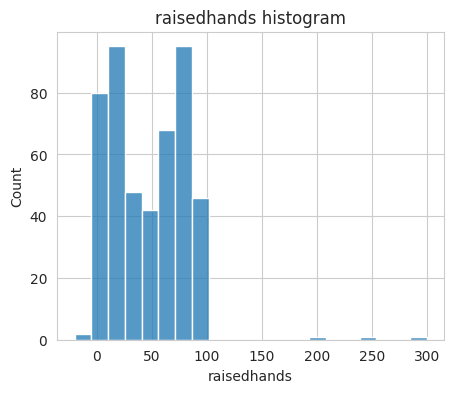

In [ ]:
# raisehands 변수의 히스토그램 그리기.
# sns.histplot(data=데이터이름, x=x축에 둘 변수명)

# 그래프 크기 설정, figsize=(가로, 세로)
plt.figure(figsize=(5,4))

# 그래프 제목
plt.title("raisedhands histogram")

# 히스토그램 그리기
sns.histplot(data=df,x='raisedhands')

 대부분의 raisedhands 값이 0~100 사이에 집중된 분포를 보여준다. 200 이상의 값은 드물게 나타나며, 이는 이상치일 가능성이 있다.

<Axes: xlabel='raisedhands', ylabel='Count'>

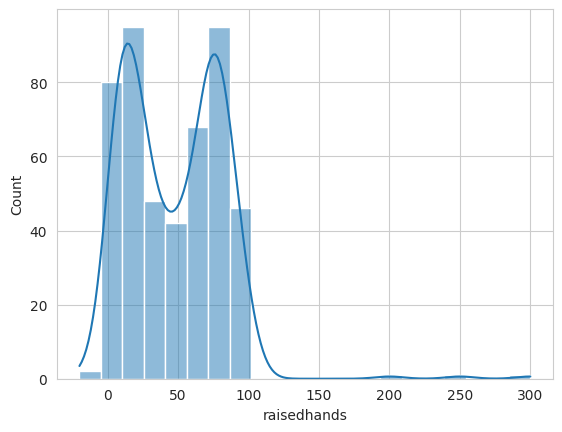

In [ ]:
# raisehands 변수의 히스토그램에 커널 밀도 추가하기

sns.histplot(data=df,x='raisedhands',kde=True)

<Axes: title={'center': 'raisehands histogram'}, xlabel='raisedhands', ylabel='Count'>

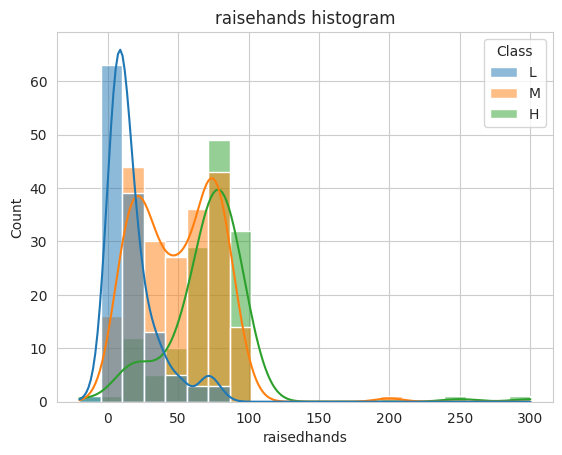

In [ ]:
# raisehands 변수의 히스토그램 + KDE + 범주형 변수 Class와의 관계 보기

plt.title('raisehands histogram')
sns.histplot(data=df,x='raisedhands',hue='Class',hue_order=['L','M','H'],kde=True)


raisedhands 변수는 값이 증가할수록 Class가 L에서 M, H로 이동하는 분포를 보여준다. L은 낮은 값(0 ~20)에 강하게 집중되며, M과 H는 높은 값(50 ~ 100)에서 주로 분포한다. 이는 raisedhands가 Class를 분류하는 데 중요한 변수일 가능성을 시사한다.

<Axes: xlabel='raisedhands'>

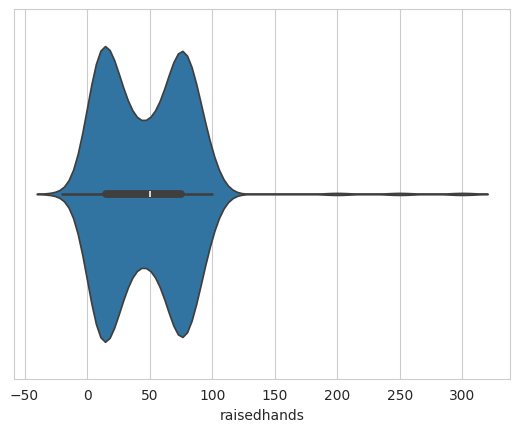

In [ ]:
# raisehands 변수를 여러가지 그래프로 시각화 해보기.

# 박스 플롯
#sns.boxplot(data=df,x='raisedhands')

# 바이올린 플롯
sns.violinplot(data=df,x='raisedhands')

<Axes: title={'center': 'VisITedResources'}, xlabel='VisITedResources', ylabel='Count'>

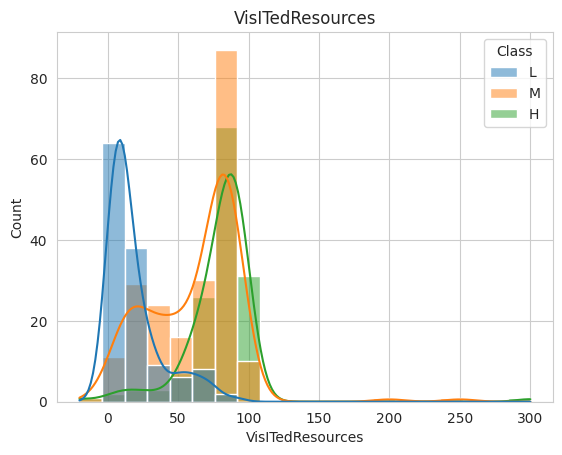

In [ ]:
# VisITedResources 변수의 히스토그램 그리기.

plt.title('VisITedResources')
sns.histplot(data=df,x='VisITedResources',hue='Class',hue_order=['L','M','H'],kde=True)

`VisitedResources` 변수는 값이 증가할수록 `Class`가 `L`에서 `M`, `H`로 이동하는 분포가 뚜렷하게 나타난다. `L`은 낮은 값(0 ~ 50)에 주로 집중되고, `M`과 `H`는 높은 값(50 ~100)에서 밀도가 크다. 이는 `VisitedResources`가 `Class` 예측에 중요한 변수임을 시사한다.

<Axes: title={'center': 'AnnouncementsView'}, xlabel='AnnouncementsView', ylabel='Count'>

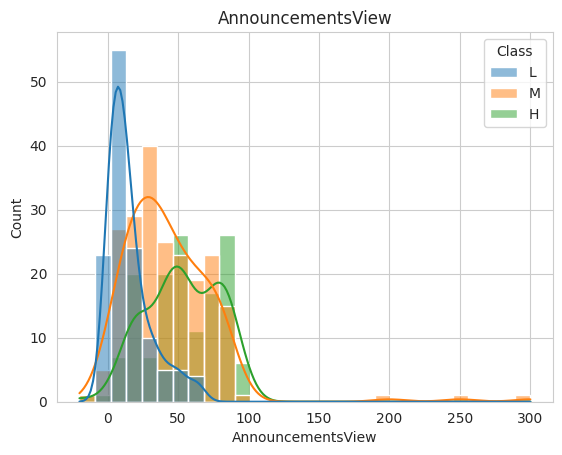

In [ ]:
# AnnouncementsView 변수의 히스토그램 그리기.

plt.title('AnnouncementsView')
sns.histplot(data=df,x='AnnouncementsView',hue='Class',hue_order=['L','M','H'],kde=True)

AnnouncementsView 변수는 값이 증가할수록 Class가 L에서 M, H로 이동하는 경향이 관찰된다. 이는 AnnouncementsView가 Class 예측에 중요한 영향을 미칠 가능성을 시사한다. 따라서, 이 변수는 주요 피처로 활용될 수 있다.

<Axes: title={'center': 'Discussion'}, xlabel='Discussion', ylabel='Count'>

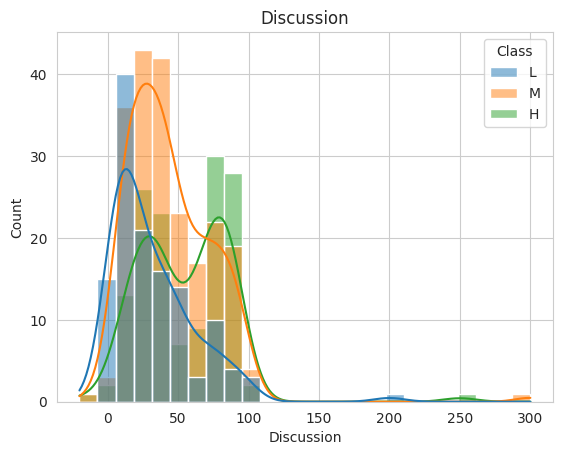

In [ ]:
# Discussion 변수의 히스토그램 그리기.

plt.title('Discussion')
sns.histplot(data=df,x='Discussion',hue='Class',hue_order=['L','M','H'],kde=True)

Discussion 변수는 값이 증가할수록 Class가 L에서 M, H로 이동하는 분포 경향이 나타난다. 특히 L은 낮은 값에 집중되고, M과 H는 점차 높은 값으로 분포가 이동하는 것으로 보인다. 이는 Discussion 변수가 Class 예측에 중요한 역할을 할 가능성을 시사한다.

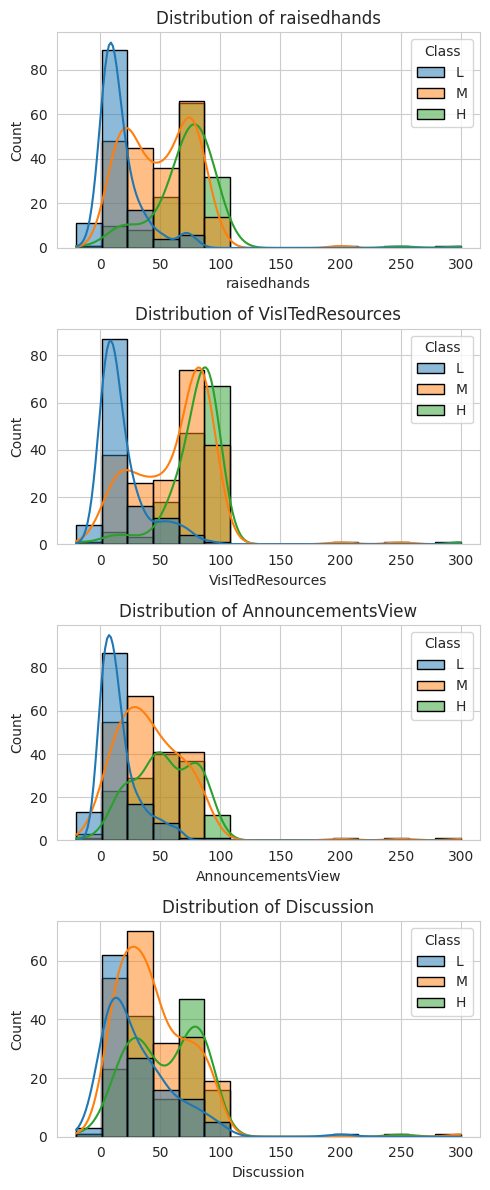

In [ ]:
# 한번에 그래프 출력하기

# 수치형 변수 선택
numeric_columns=df.select_dtypes(include=['number'])

# Seaborn을 사용한 히스토그램 출력
fig,axes=plt.subplots(len(numeric_columns.columns),1,figsize=(5,3 * len(numeric_columns.columns)))

for i,col in enumerate(numeric_columns.columns):
    sns.histplot(data=df,x=col,bins=15,kde=True,ax=axes[i],hue='Class',hue_order=['L','M','H'],edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


### 1-4 범주형 변수 분석

In [ ]:
# 범주형 변수 확인

categorical_columns=df.select_dtypes(include=['object']).columns
print("범주형 컬럼 이름:", categorical_columns)


범주형 컬럼 이름: Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')


In [ ]:
# gender 변수 value_counts()로 파악하기
# gender 열의 값이 각각 몇 번 나오는지 세어보는 코드

df['gender'].value_counts()

,count
gender,
M,305
F,175


In [ ]:
# NationalITy Value_counts()로 파악하기
# 미리 value_counts()로 값을 확인 후 그래프로 시각화할 수 있는지 확인
# 너무 값이 많을 경우 그래프로 그리는 것이 필요없을 수 있음

df['NationalITy'].value_counts()

,count
NationalITy,
KW,179
Jordan,172
Palestine,28
Iraq,22
lebanon,17
Tunis,12
SaudiArabia,11
Egypt,9
Syria,7


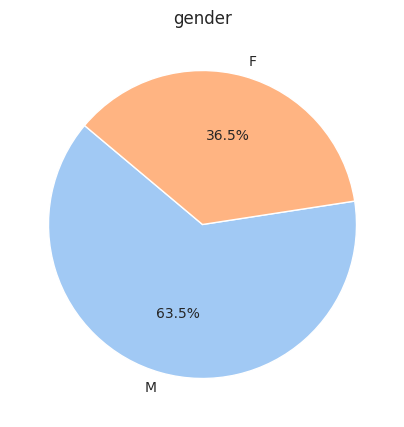

In [ ]:
# gender 변수 비율 파이차트 확인하기

# 파이 차트로 그릴 범주형 변수 선택
category_counts = df['gender'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(5, 5)) # figsize=(가로,세로)
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel")) # seaborn에서는 color palette를 제공
plt.title("gender")
plt.show()


남성(M): 63.5%로 데이터에서 더 높은 비율을 차지하고 있습니다.
여성(F): 36.5%로 상대적으로 적은 비율을 차지합니다.

<Axes: title={'center': 'gender'}, xlabel='gender', ylabel='count'>

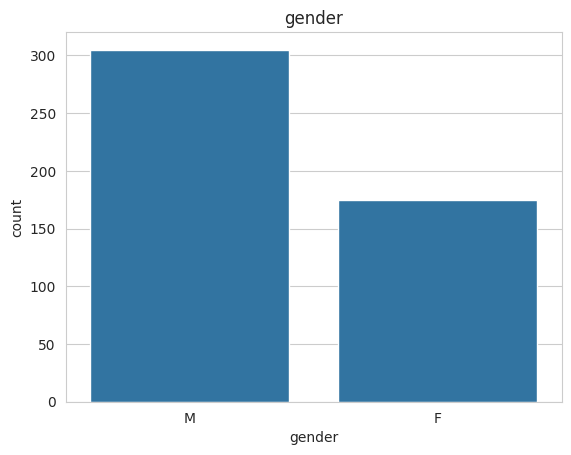

In [ ]:
# gender 변수 막대 그래프로 확인하기

plt.title('gender')
sns.countplot(data=df,x='gender')

<Axes: title={'center': 'gender and class'}, xlabel='gender', ylabel='count'>

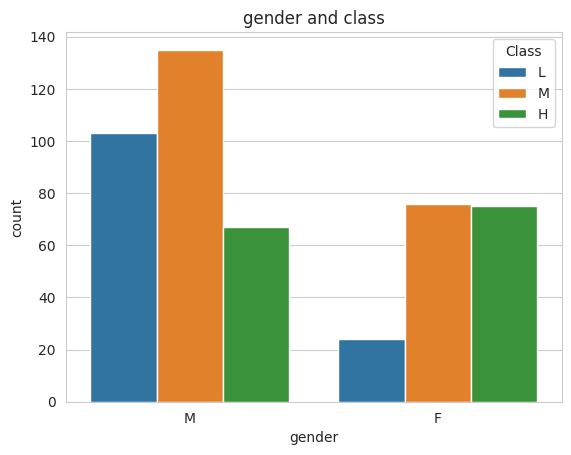

In [ ]:
# gender 변수 Class 변수와 함께 막대 그래프로 확인하기

plt.title('gender and class')
sns.countplot(data=df,x='gender',hue='Class',hue_order=['L','M','H'])

- 남성(M)의 경우 중간 Class(M)의 비율이 가장 높으며, 낮은 Class(L)와 높은 Class(H)의 비율은 상대적으로 낮습니다.
- 여성(F)의 경우 중간 Class(M)와 높은 Class(H)의 비율이 비슷하며, 낮은 Class(L)의 비율은 매우 낮습니다.


 성별에 따라 Class 분포가 다르게 나타나므로, 성별은 Class 예측에서 잠재적으로 중요한 영향을 줄 수 있는 변수로 보입니다. 모델 학습 시 이러한 차이를 고려해야 할 가능성이 있습니다.








<Axes: title={'center': 'Topic and raisedhands'}, xlabel='Topic', ylabel='raisedhands'>

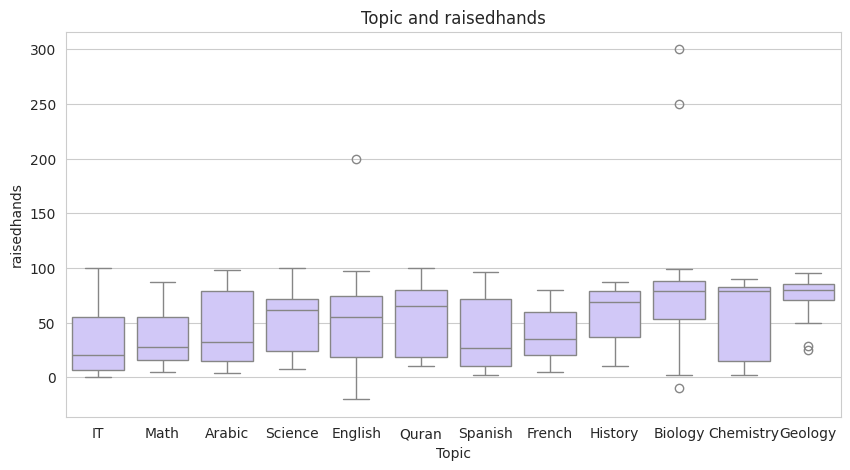

In [ ]:
# Topic 변수와 raisedhands 변수 시각화

# boxplot
plt.figure(figsize=(10,5))
plt.title('Topic and raisedhands')
sns.boxplot(data=df, x='Topic', y='raisedhands',color=(204/255, 192/255, 255/255))

# violinplot
#sns.violinplot(data=df,x='Topic',y='raisedhands')

- 대부분의 Topic에서 'raisedhands'의 중앙값은 비슷하지만, Biology와 Chemistry는 더 높은 중앙값과 넓은 분포를 보이며, 학생 참여도가 상대적으로 높음을 나타냅니다.
- 일부 주제(예: History)에서는 낮은 참여도와 제한된 분포를 보입니다.
- 이상치(outliers)가 일부 주제(예: English, Biology)에서 관찰되며, 특정 학생들이 다른 학생들보다 훨씬 더 많이 손을 든 사례를 나타냅니다.
- 주제별 학생 참여도의 차이를 이해하고, 특정 주제에서 높은 참여도가 예측 모델의 중요한 변수로 작용할 수 있습니다.

<Axes: title={'center': 'NationalITy'}, xlabel='NationalITy', ylabel='count'>

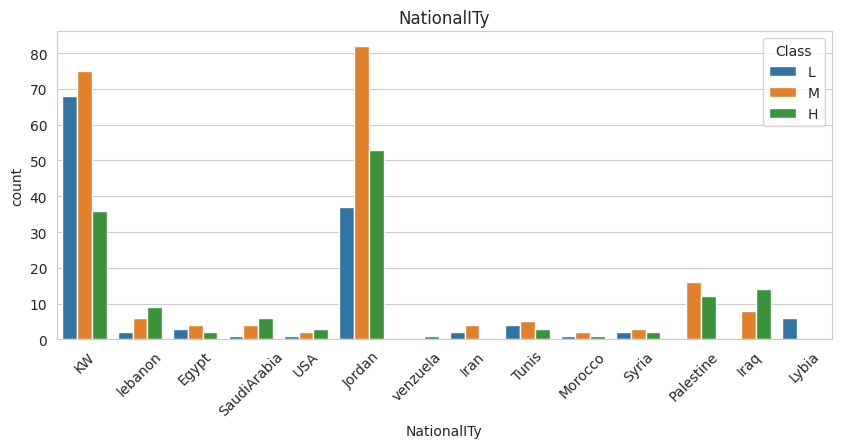

In [ ]:
# NationalITy 변수 막대 그래프로 확인하기

plt.figure(figsize=(10,4)) # 크기조정
plt.xticks(rotation=45) # X축 라벨 45도 기울이기, label이 너무 길 경우 x축에 다 출력하지 못하기 때문에 기울이기
plt.title('NationalITy')
sns.countplot(data=df,x='NationalITy',hue='Class',hue_order=['L','M','H'])


- **KW(Kuwait)**와 Jordan에서 L(Class Low)과 M(Class Medium)의 비율이 매우 높으며, H(Class High)의 비율은 비교적 낮습니다.
- 일부 국가(예: USA 및 Saudi Arabia)에서는 H(Class High)가 더 두드러지는 경향을 보입니다.


<Axes: title={'center': 'Topic'}, xlabel='Topic', ylabel='count'>

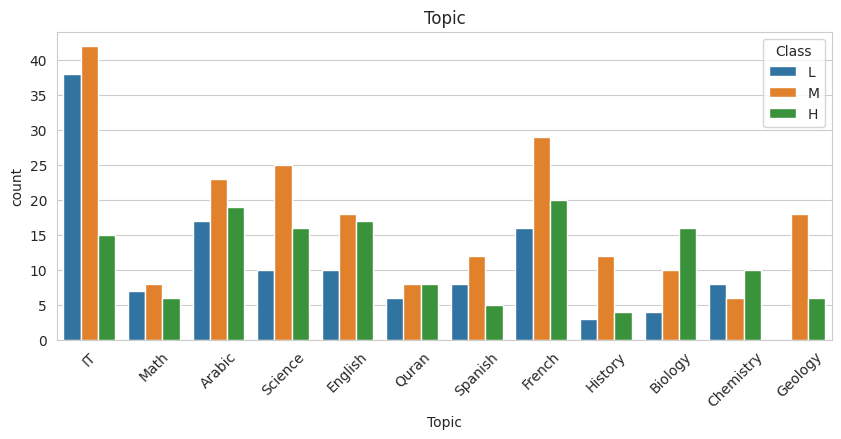

In [ ]:
# Topic 변수 막대 그래프로 확인하기

plt.figure(figsize=(10,4)) # 크기조정
plt.xticks(rotation=45) # X축 라벨 45도 기울이기
plt.title('Topic')
sns.countplot(data=df,x='Topic',hue='Class',hue_order=['L','M','H'])

<Axes: title={'center': 'Relation and Class'}, xlabel='Relation', ylabel='count'>

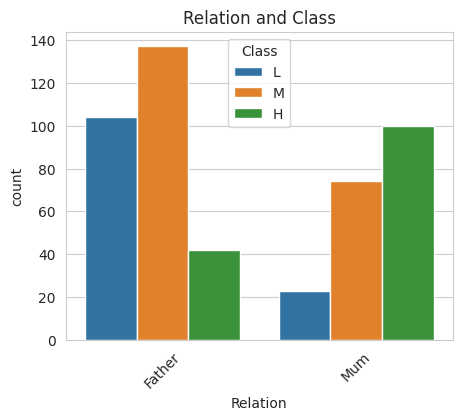

In [ ]:
# Relation 변수 막대 그래프로 확인하기

plt.figure(figsize=(5,4)) # 크기조정
plt.xticks(rotation=45) # X축 라벨 45도 기울이기
plt.title('Relation and Class')
sns.countplot(data=df,x='Relation',hue='Class',hue_order=['L','M','H'])

- Father 관계에서는 M(Class Medium)의 비율이 가장 높고, L(Class Low)와 H(Class High)가 비교적 비슷한 수준으로 나타납니다.
- 반면, Mum 관계에서는 H(Class High)의 비율이 가장 높게 나타나며, L(Class Low)의 비율은 상대적으로 낮습니다.
- 이 결과는 학생과 부모 간의 관계 유형이 학습 성과(Class)에 영향을 미칠 가능성을 시사합니다.


  이를 통해 Relation이 학습 성과 예측에서 중요한 요인으로 작용할 수 있음을 알 수 있습니다.








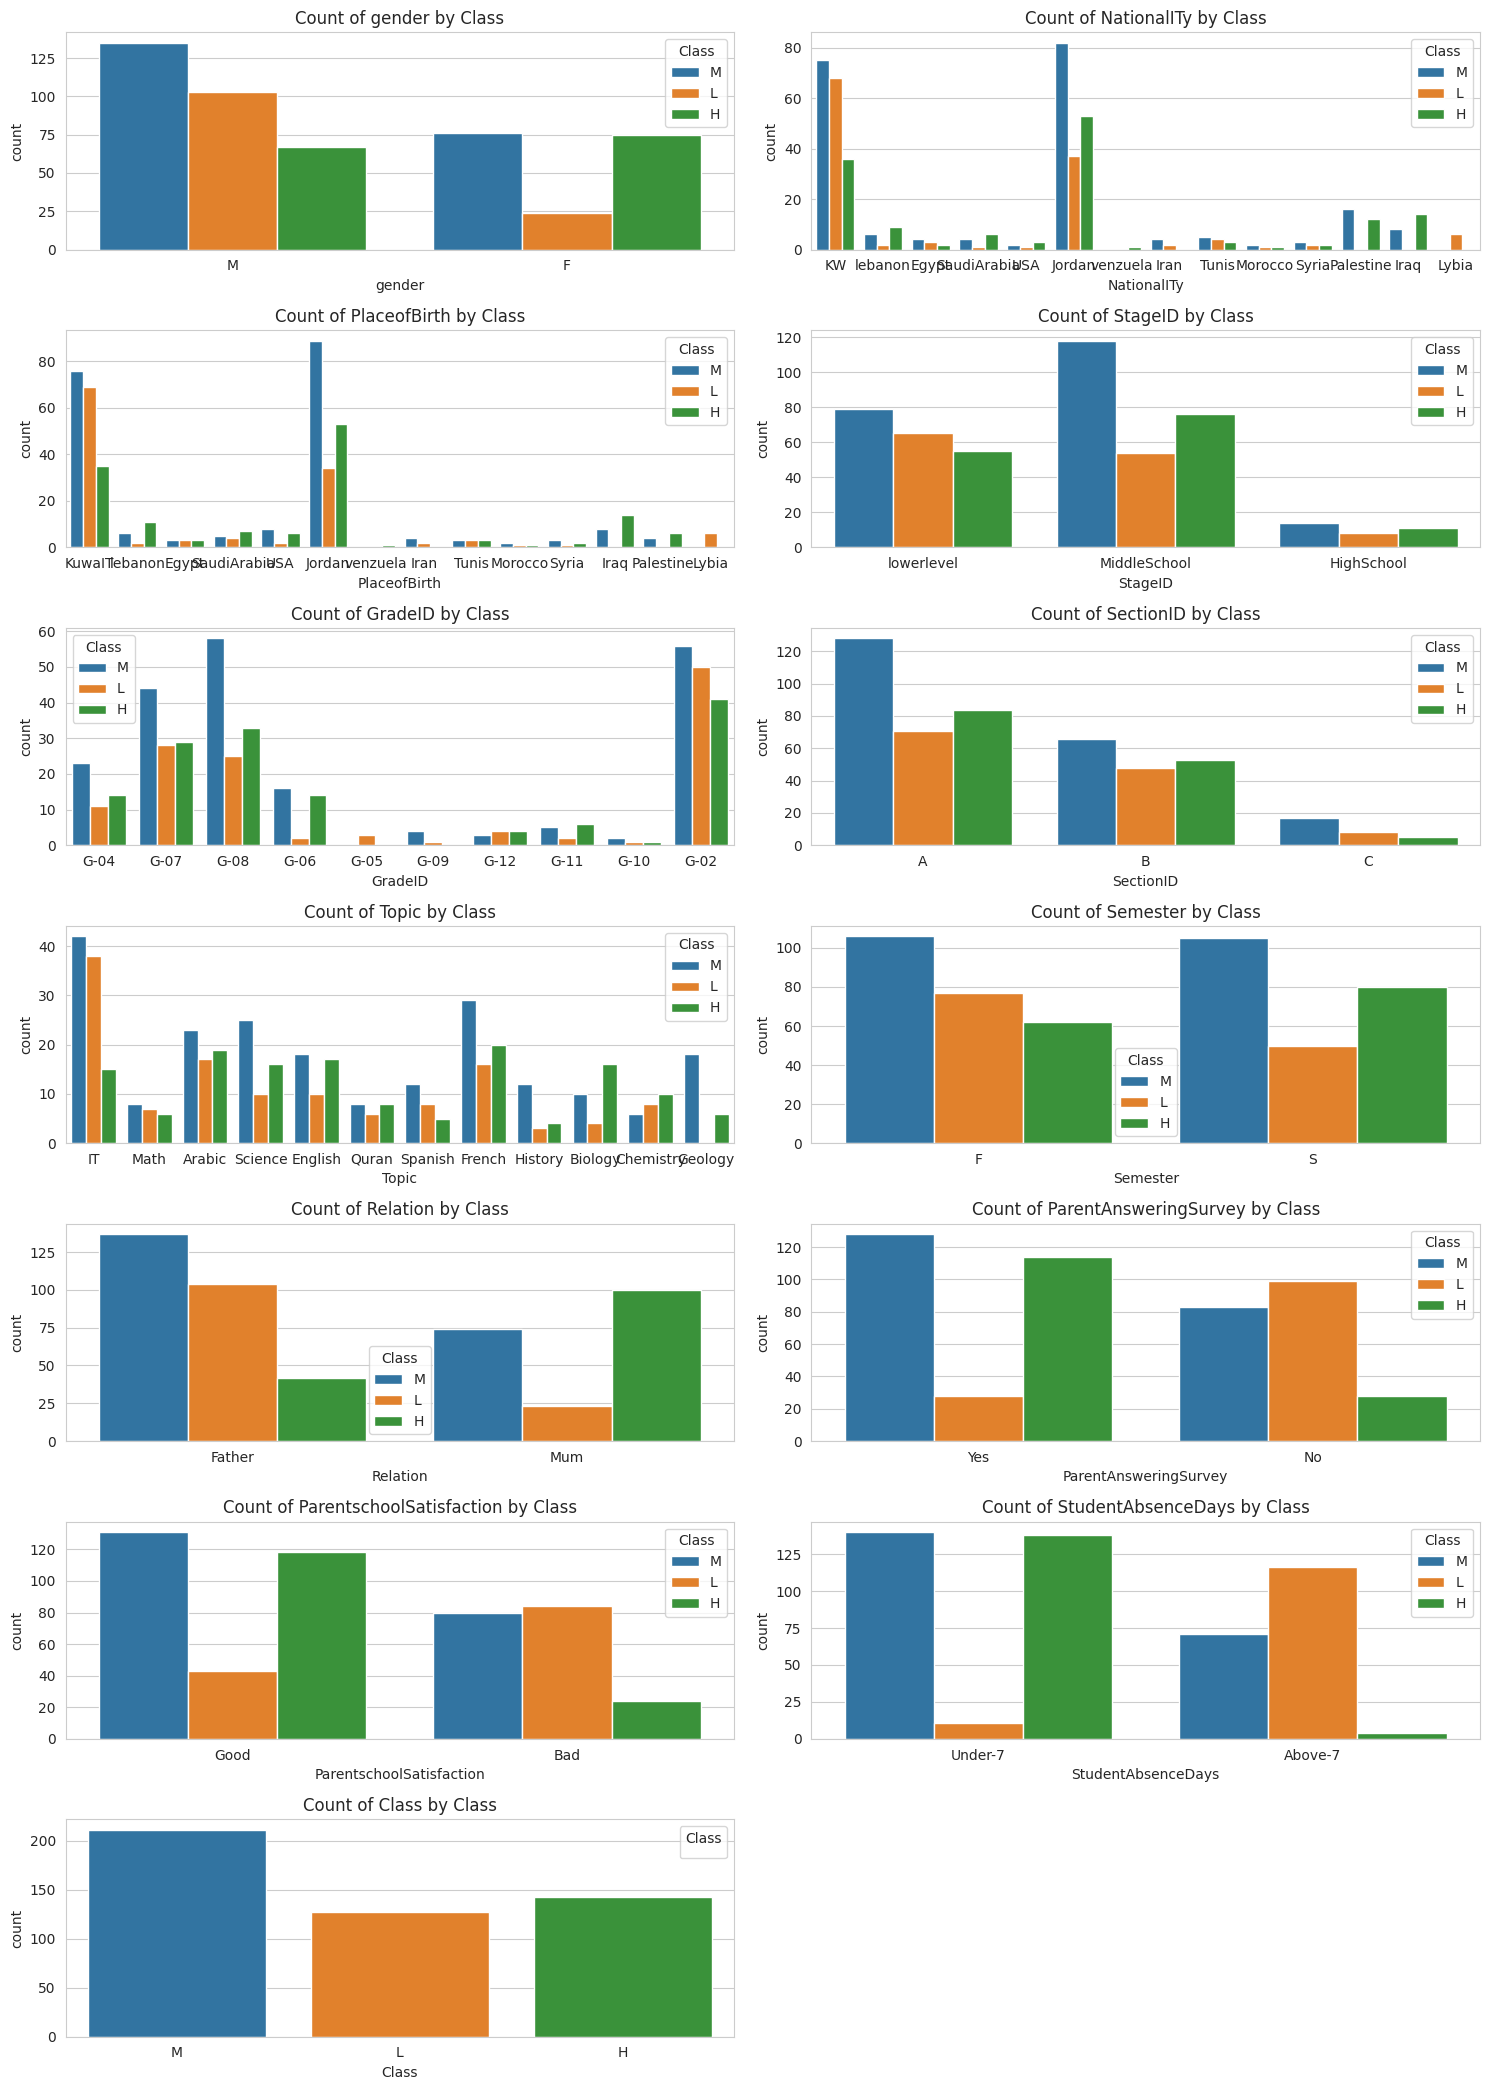

In [ ]:
# 범주형 변수 그래프 한번에 확인하기

# 범주형 변수 컬럼 이름들
categorical_columns=df.select_dtypes(include=['object']).columns

# 서브플롯 크기 지정 (7행 2열로 14개의 플롯 생성)
fig,axes=plt.subplots(7,2,figsize=(15,3 * 7))
axes=axes.flatten()  # 2D 배열을 1D 배열로 펼쳐서 인덱스로 접근

# 반복문으로 각 countplot 그리기
for i,col in enumerate(categorical_columns):
    sns.countplot(data=df,x=col,hue='Class',ax=axes[i])
    axes[i].set_title(f"Count of {col} by Class")
    axes[i].legend(title='Class')

# 남는 빈 공간 숨기기
for j in range(i+1,len(axes)):
    axes[j].set_visible(False)

# 레이아웃 정리
plt.tight_layout()
plt.show()

### 1-5. 상관관계 분석

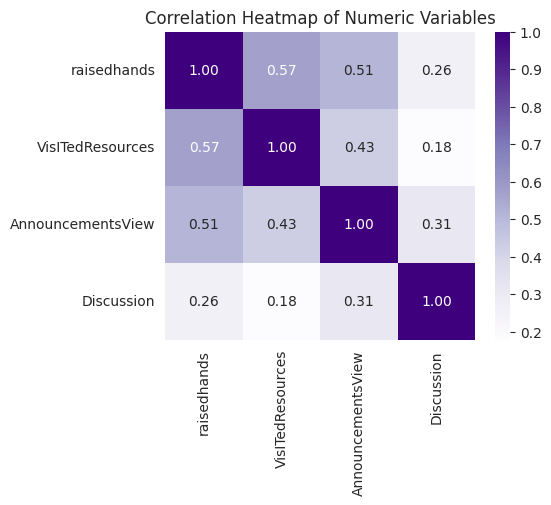

In [ ]:
# 상관관계 그래프 그리기

numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix=df[numeric_columns].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt=".2f") # annot : 상관계수 표시, cmap : color, fmt : 소수점표시
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

- raisedhands와 VisITedResources는 0.57로 중간 정도의 양의 상관관계를 보이며, 이는 학생들이 손을 들고 참여하는 정도와 방문한 학습 자원의 수가 어느 정도 관련이 있음
- raisedhands와 AnnouncementsView의 상관계수는 0.51로, 손을 든 횟수와 공지사항 조회 수 간에도 연관성이 있음을 나타냄
- Discussion과 다른 변수들은 전반적으로 낮은 상관계수를 보이며(최대 0.31), 토론 활동은 다른 변수들과 상대적으로 독립적인 경향을 보임

  이 히트맵을 통해 학습 성과에 영향을 미칠 가능성이 높은 변수 간의 관계를 파악하고, 예측 모델 개발 시 변수 선택에 참고할 수 있습니다.

## 2. 데이터 전처리

### 2-1. 결측값 처리

In [ ]:
# 결측치 확인

df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,1


raisedhands, VisITedResources, AnnouncementsView 변수에 결측값이 있는 것을 발견.

In [ ]:
# 결측값 제거 후 확인

df = df.dropna()
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


### 2-2. 이상치 탐지 및 처리

EDA 시 수치형 변수의 히스토그램 시각화를 통해 모든 수치형 변수에 이상치가 있음을 확인하였다.  
   이상치를 제거하기 위해 IQR 방식과 Z-score을 사용해 이상치를 제거해보자.

#### ▶ **IQR (Interquartile Range)**

IQR 방식은 데이터의 중앙 집중 경향을 나타내는 사분위수를 이용해 이상치를 탐지하는 통계적 기법.
  이는 데이터가 특정 분포를 따르지 않아도 적용 가능하며, 특히 이상치(outlier) 탐지에 효과적이다.

- IQR의 정의
  - 데이터의 75번째 백분위수(Q3)와 25번째 백분위수(Q1)의 차이로 계산.
  - IQR = Q3 - Q1

- 사분위수의 의미:
  - Q1 (1사분위수): 데이터의 하위 25% 지점.
  - Q3 (3사분위수): 데이터의 상위 25% 지점.
  - Q2 (2사분위수): 데이터의 중앙값(50번째 백분위수).


#### ▶ **z-score**

- z-score: 데이터가 평균에서 얼마나 떨어져 있는지 나타내는 값. (기준: 표준편차)
- 이상치 탐지 기준: z-score의 절대값이 3보다 크면 이상치로 간주함.

In [ ]:
# IQR 방식으로 이상치 탐지 및 제거

numerical_columns=['raisedhands','VisITedResources','AnnouncementsView', 'Discussion']

# 수치형 컬럼의 Q1(25번째 백분위수)와 Q3(75번째 백분위수) 계산
Q1=df[numerical_columns].quantile(0.25)
Q3=df[numerical_columns].quantile(0.75)
IQR=Q3-Q1  # IQR 계산

# IQR을 사용한 상한과 하한 계산
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# 이상치가 없는 데이터만 필터링
df_cleaned_iqr=df.copy()
for col in numerical_columns:
    lower=lower_bound[col]
    upper=upper_bound[col]
    df_cleaned_iqr=df_cleaned_iqr[(df_cleaned_iqr[col] >= lower) & (df_cleaned_iqr[col] <= upper)]

# 데이터 정보 출력
df_cleaned_iqr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 465 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    465 non-null    object 
 1   NationalITy               465 non-null    object 
 2   PlaceofBirth              465 non-null    object 
 3   StageID                   465 non-null    object 
 4   GradeID                   465 non-null    object 
 5   SectionID                 465 non-null    object 
 6   Topic                     465 non-null    object 
 7   Semester                  465 non-null    object 
 8   Relation                  465 non-null    object 
 9   raisedhands               465 non-null    float64
 10  VisITedResources          465 non-null    float64
 11  AnnouncementsView         465 non-null    float64
 12  Discussion                465 non-null    int64  
 13  ParentAnsweringSurvey     465 non-null    object 
 14  ParentschoolSat

<Axes: xlabel='raisedhands', ylabel='Count'>

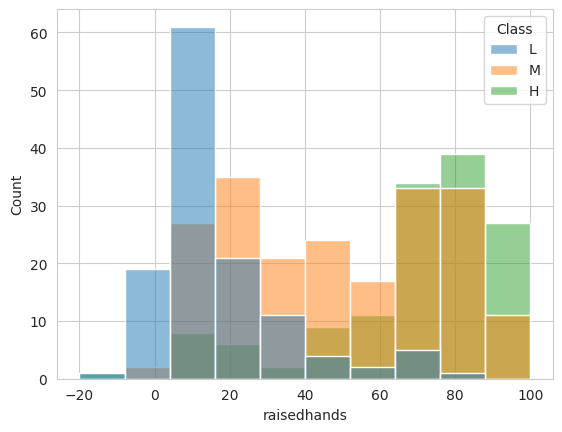

In [ ]:
# IQR 방식으로 이상치 제거 후 raisedhands 히스토그램 확인

sns.histplot(df_cleaned_iqr,x='raisedhands',hue='Class',hue_order=['L','M','H'])

raisedhands 변수는 수업시간에 손을 든 횟수인데, 음수값이 아직 남아있는 모습을 볼 수 있다.
  
  이 경우 최솟값을 0으로 설정해 음수값을 제거할 수 있다.

In [ ]:
# 음수제거를 위해 IQR 코드 수정

numerical_columns=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# 수치형 컬럼의 Q1(25번째 백분위수)와 Q3(75번째 백분위수) 계산
Q1=df[numerical_columns].quantile(0.25)
Q3=df[numerical_columns].quantile(0.75)
IQR=Q3 - Q1  # IQR 계산

# IQR을 사용한 상한과 하한 계산
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

# 이상치가 없는 데이터만 필터링 (IQR 조건 + 음수 제거)
df_cleaned_iqr=df.copy()
for col in numerical_columns:
    lower=max(0, lower_bound[col])  # 음수 제거를 위한 수정
    upper=upper_bound[col]
    df_cleaned_iqr=df_cleaned_iqr[(df_cleaned_iqr[col] >= lower) & (df_cleaned_iqr[col] <= upper)]

# 데이터 정보 출력
df_cleaned_iqr.info()


<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    457 non-null    object 
 1   NationalITy               457 non-null    object 
 2   PlaceofBirth              457 non-null    object 
 3   StageID                   457 non-null    object 
 4   GradeID                   457 non-null    object 
 5   SectionID                 457 non-null    object 
 6   Topic                     457 non-null    object 
 7   Semester                  457 non-null    object 
 8   Relation                  457 non-null    object 
 9   raisedhands               457 non-null    float64
 10  VisITedResources          457 non-null    float64
 11  AnnouncementsView         457 non-null    float64
 12  Discussion                457 non-null    int64  
 13  ParentAnsweringSurvey     457 non-null    object 
 14  ParentschoolSat

<Axes: xlabel='raisedhands', ylabel='Count'>

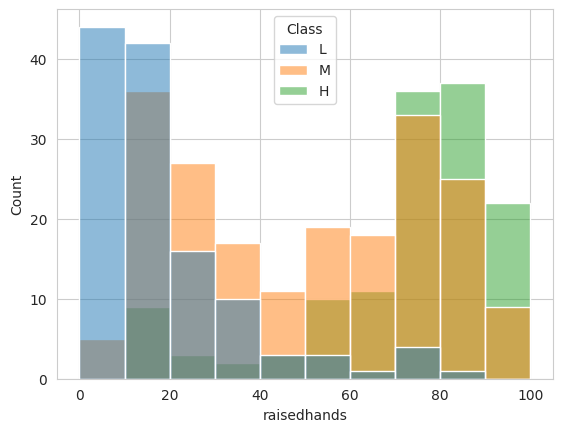

In [ ]:
# 음수 이상치 제거 후 히스토그램

sns.histplot(df_cleaned_iqr,x='raisedhands',hue='Class',hue_order=['L','M','H'])

또는 각 변수마다 음수 값을 지워줄 수도 있다.

In [ ]:
# VisITedResources 컬럼에서 음수인 값 필터링

# df = df[df['VisITedResources'] >= 0]

Z-score 방식 이상치 제거

In [ ]:
# Z-Score 방식으로 이상치 제거

"""from scipy.stats import zscore

df_no_outliers_zscore = df.copy() # 데이터 복사

# Z-Score 계산 및 필터링
threshold=3  # 임계값 설정 (절대값이 3보다 큰 경우 이상치로 간주)
for col in numerical_columns:
    df_no_outliers_zscore = df_no_outliers_zscore[zscore(df_no_outliers_zscore[col]).abs() <= threshold]"""

### 2-3. 스케일링 및 정규화

해당 실습에서는 데이터의 범위를 0과 1사이로 변환하는 MinMaxScaler로 정규화해보겠다. 이를 통해*서로 다른 단위를 가진 변수들을 동일한 범위로 맞출 수 있다.*

MinMaxScaler, StandardScaler, RobustScaler, Normalizer 정규화 함수들은 사이킷런의 preprocessing에서 제공하고 있다.

In [ ]:
# 사이킷런 임포트
from sklearn.preprocessing import MinMaxScaler

# 스케일러 적용할 변수 설정
numeric_columns=df_cleaned_iqr.select_dtypes(include=['number']).columns

# StandardScaler 적용
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df_cleaned_iqr[numeric_columns])

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df=pd.DataFrame(scaled_data,columns=numeric_columns,index=df_cleaned_iqr.index)

# 스케일링된 데이터와 나머지 컬럼 병합 (인덱스를 df_cleaned_iqr로 유지)
result_df=pd.concat([scaled_df, df_cleaned_iqr.drop(columns=numeric_columns)], axis=1)

result_df.head()


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0.15,0.161616,0.020408,0.193878,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,0.20,0.202020,0.030612,0.244898,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,0.10,0.070707,0.000000,0.295918,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,0.30,0.252525,0.051020,0.346939,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,0.40,0.505051,0.122449,0.500000,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MaxAbsScaler
# 다른 스케일러를 사용해 데이터 전처리를 테스트하고, 성능 차이를 확인해보기

'''# StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_cleaned_iqr[numeric_columns])
scaled_df=pd.DataFrame(scaled_data,columns=numeric_columns)
result_df=pd.concat([scaled_df,df_cleaned_iqr.drop(columns=numeric_columns)],axis=1)

# RobustScaler
scaler=RobustScaler()
scaled_data=scaler.fit_transform(df_cleaned_iqr[numeric_columns])
scaled_df=pd.DataFrame(scaled_data,columns=numeric_columns)
result_df=pd.concat([scaled_df,df_cleaned_iqr.drop(columns=numeric_columns)],axis=1)

# Normalizer
scaler=Normalizer()
scaled_data=scaler.fit_transform(df_cleaned_iqr[numeric_columns])
scaled_df=pd.DataFrame(scaled_data,columns=numeric_columns)
result_df=pd.concat([scaled_df,df_cleaned_iqr.drop(columns=numeric_columns)],axis=1)

# MaxAbsScaler
scaler=MaxAbsScaler()
scaled_data=scaler.fit_transform(df_cleaned_iqr[numeric_columns])
scaled_df=pd.DataFrame(scaled_data,columns=numeric_columns)
result_df=pd.concat([scaled_df,df_cleaned_iqr.drop(columns=numeric_columns)],axis=1)
'''

### 2-4. 데이터 타입 변환

#### ▶ **명목형 변수를 원핫인코딩을 이용해 전처리하는 이유**

1. 수치적 크기나 순서를 생성하지 않음:
  - 명목형 데이터는 범주 간 우열이 없으므로, 크기나 순서가 생성되지 않도록 처리해야 함.
2. 모델 호환성:
  - 대부분의 머신러닝 모델은 범주형 데이터를 직접 처리하지 못하고, 수치형 데이터만 처리 가능하기 때문.
3. 정보 보존:
  - 각 범주를 독립된 열로 변환하여 정보를 온전히 유지.



#### ▶ **수동 매핑을 사용하는 이유**

1. 순서 정보 유지:

    - 순서형 데이터는 범주 간 우열(순위)가 있으므로, 숫자로 변환하여 순서를 명확히 표현.
    - 예: 'Low'(1) < 'Middle'(2) < 'High'(3)


2. 모델 입력 호환성:
   - 머신러닝 모델은 숫자형 데이터를 선호하며, 순서를 가진 범주형 데이터는 수동 매핑을 통해 모델에 적합한 형식으로 변환.

3. 불필요한 계산 자원 절약:
  - 순서형 데이터에 원핫인코딩을 사용하면 불필요한 차원이 늘어나고, 계산 자원을 낭비할 수 있다.

4. 수치화된 값 기반 분석:
  - 매핑된 숫자를 사용해 통계적 분석(평균, 중앙값 등)을 수행하거나, 모델에서 효율적으로 순서를 학습하도록 만든다.

In [ ]:
# 계속 데이터를 확인하는 것이 중요

result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   raisedhands               457 non-null    float64
 1   VisITedResources          457 non-null    float64
 2   AnnouncementsView         457 non-null    float64
 3   Discussion                457 non-null    float64
 4   gender                    457 non-null    object 
 5   NationalITy               457 non-null    object 
 6   PlaceofBirth              457 non-null    object 
 7   StageID                   457 non-null    object 
 8   GradeID                   457 non-null    object 
 9   SectionID                 457 non-null    object 
 10  Topic                     457 non-null    object 
 11  Semester                  457 non-null    object 
 12  Relation                  457 non-null    object 
 13  ParentAnsweringSurvey     457 non-null    object 
 14  ParentschoolSat

범주형 데이터에서 순서형 데이터, 명목형 데이터를 구분하여 데이터 종류 별로 전처리를 해줘야 한다.
  class 변수는 타겟변수이므로 제외한다.

In [ ]:
# 명목형 데이터 원-핫 인코딩으로 처리하기

# 명목형 데이터 컬럼만, Class는 제외. Class는 순서형 데이터이기 때문에
categorical_columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
                      'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
                      'ParentschoolSatisfaction', 'StudentAbsenceDays']

# 판다스의 get_dummies 함수로 원-핫 인코딩
encoded_data=pd.get_dummies(result_df, columns=categorical_columns, drop_first=True)

display(encoded_data.head())
display(encoded_data.info())

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,0.15,0.161616,0.020408,0.193878,M,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,0.20,0.202020,0.030612,0.244898,M,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
2,0.10,0.070707,0.000000,0.295918,L,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,0.30,0.252525,0.051020,0.346939,L,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,0.40,0.505051,0.122449,0.500000,M,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 479
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   raisedhands                    457 non-null    float64
 1   VisITedResources               457 non-null    float64
 2   AnnouncementsView              457 non-null    float64
 3   Discussion                     457 non-null    float64
 4   Class                          457 non-null    object 
 5   gender_M                       457 non-null    bool   
 6   NationalITy_Iran               457 non-null    bool   
 7   NationalITy_Iraq               457 non-null    bool   
 8   NationalITy_Jordan             457 non-null    bool   
 9   NationalITy_KW                 457 non-null    bool   
 10  NationalITy_Lybia              457 non-null    bool   
 11  NationalITy_Morocco            457 non-null    bool   
 12  NationalITy_Palestine          457 non-null    bool   


None

In [ ]:
# 순서형 데이터 Class 수동 매핑
# Low, Middle, High 순으로 숫자 매핑.

mapping={'L':1,'M':2,'H':3}
encoded_data['Class'] = encoded_data['Class'].map(mapping)

encoded_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,0.15,0.161616,0.020408,0.193878,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,0.20,0.202020,0.030612,0.244898,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
2,0.10,0.070707,0.000000,0.295918,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,0.30,0.252525,0.051020,0.346939,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,0.40,0.505051,0.122449,0.500000,2,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 479
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   raisedhands                    457 non-null    float64
 1   VisITedResources               457 non-null    float64
 2   AnnouncementsView              457 non-null    float64
 3   Discussion                     457 non-null    float64
 4   Class                          457 non-null    int64  
 5   gender_M                       457 non-null    bool   
 6   NationalITy_Iran               457 non-null    bool   
 7   NationalITy_Iraq               457 non-null    bool   
 8   NationalITy_Jordan             457 non-null    bool   
 9   NationalITy_KW                 457 non-null    bool   
 10  NationalITy_Lybia              457 non-null    bool   
 11  NationalITy_Morocco            457 non-null    bool   
 12  NationalITy_Palestine          457 non-null    bool   


정형데이터 전처리 완료! 👼

-----------------------------------------------------

# 심화 : 전처리한 정형 데이터로 모델링 해보기

정형데이터 EDA와 전처리가 모두 끝났다면, 실제로 모델링을 해보자.

## 1. 학습 데이터와 테스트 데이터 분리하기

X: 독립 변수 (입력 데이터). Class를 제외한 모든 열.
y: 종속 변수 (목표값). Class 열.

train_test_split을 사용하여 데이터를 80% 학습, 20% 테스트로 분리한다.



> 왜 분리해주는 건가요? 🙄



  데이터를 학습용(train)과 테스트용(test)으로 분리하는 이유는 모델의 일반화 성능을 평가하기 위함.
- 모델이 학습한 데이터로만 성능을 평가하면, 단순히 학습 데이터에 과적합(overfitting)될 가능성이 있다.
- 즉, 모델이 새로운 데이터에 대해 잘 동작하지 않을 수 있다.
- 테스트 데이터는 학습에 사용되지 않은 새로운 데이터로 간주됨.
- 테스트 데이터를 통해 모델이 실제로 보지 못한 데이터를 얼마나 잘 예측할 수 있는지 확인할 수 있다.



In [ ]:
df=encoded_data.copy()
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,0.15,0.161616,0.020408,0.193878,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
1,0.20,0.202020,0.030612,0.244898,2,True,False,False,False,True,...,True,False,False,False,False,False,False,True,True,True
2,0.10,0.070707,0.000000,0.295918,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
3,0.30,0.252525,0.051020,0.346939,1,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,0.40,0.505051,0.122449,0.500000,2,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class',axis=1)
y = df['Class']

print(X.shape)
print(y.shape)

(457, 60)
(457,)


## 2. 학습 데이터와 테스트 데이터 분리하기

사이킷런에서는 학습데이터와 테스트데이터를 쉽게 분리할 수 있도록 함수를 제공하고 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 학습 데이터 80%, 테스트 데이터 10%으로 나누기
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2024)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(411, 60)
(46, 60)
(411,)
(46,)


## 3. Classification 모델 학습

- Logistic Regression
- RandomForest Regression
- Xgboost

세가지 모델로 성능 비교

해당 데이터가 풀어야할 태스크는 Class 3개를 중 하나를 예측하는 것이므로 분류에 해당된다. 유명한 분류 모델 세가지로 성능을 확인해보자.

### 3-1. 로지스틱 회귀


In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# 모델 학습 평가
from sklearn.metrics import classification_report

pred = lr.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           1       1.00      0.75      0.86        16
           2       0.62      0.76      0.68        17
           3       0.69      0.69      0.69        13

    accuracy                           0.74        46
   macro avg       0.77      0.74      0.74        46
weighted avg       0.77      0.74      0.75        46



### 3-2. 랜덤포레스트


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

pred = rf.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.67      0.71      0.69        17
           3       0.64      0.69      0.67        13

    accuracy                           0.76        46
   macro avg       0.77      0.76      0.76        46
weighted avg       0.78      0.76      0.77        46



### 3-3. XGBoost


- XGBClassifier는 0부터 시작하는 정수형 클래스 레이블을 요구.
- 현재 클래스 레이블이 [1, 2, 3]으로 설정되어있기 때문에, [0, 1, 2]로 수정.

In [ ]:
# y 값을 0부터 시작하도록 변환
y_transformed = y - y.min()

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.1, random_state=2024, stratify=y_transformed)


In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import classification_report

pred = xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.81      0.85      0.83        20
           2       0.79      0.85      0.81        13

    accuracy                           0.85        46
   macro avg       0.87      0.85      0.85        46
weighted avg       0.86      0.85      0.85        46



## 모델학습 후 feature importance 확인

- 머신러닝 모델, 특히 XGBoost와 같은 앙상블 모델은 복잡한 연산을 기반으로 작동해 결과를 예측한다.
- feature importance를 확인하면 모델이 어떤 변수를 더 중요하게 사용했는지 알 수 있어 모델의 해석 가능성이 높아진다.
- Feature Importance를 통해 중요한 변수를 확인하여, 더 나은 데이터 전처리 및 특성 공학(feature engineering)을 수행할 수 있다.
- 불필요하거나 중요도가 낮은 변수를 제거하여 모델 성능을 최적화하고 학습 시간을 단축할 수 있다.

<Figure size 1000x800 with 0 Axes>

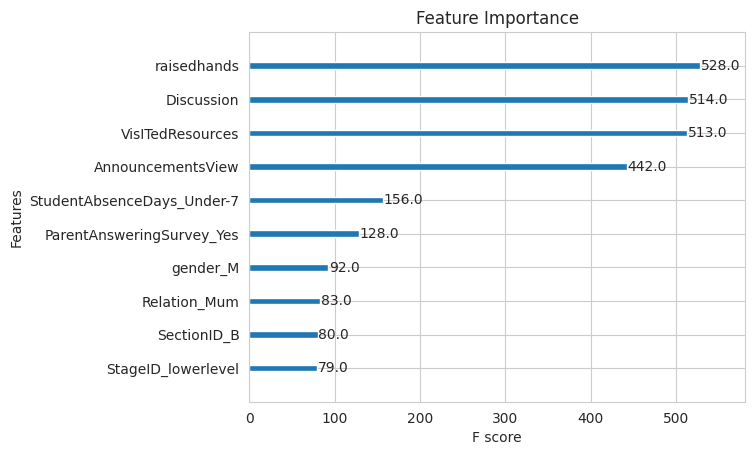

In [ ]:
# xgboost의 모델 학습 후 feature importance 확인

from xgboost import plot_importance

# Feature importance plot
plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=10)  # 상위 10개 중요 feature만 표시
plt.title('Feature Importance')
plt.show()


raisedhands, Discussion, VisitedResources, AnnouncementsView가 가장 중요한 변수로, 높은 F 점수를 기록하며 모델 성능에 큰 영향을 미친다.